In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import re
from string import punctuation

In [3]:
df = pd.read_csv("C:\\Users\\pankaj\\Documents\\Python notebooks\\train.csv").fillna("")

In [34]:
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_n_words,q2_n_words,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,0.100000
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,86,90,16,16,0.258065
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0,19,62,4,11,0.000000
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,30,41,7,9,0.250000
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,31,37,8,8,0.375000
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,60,49,9,9,0.166667


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404290 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


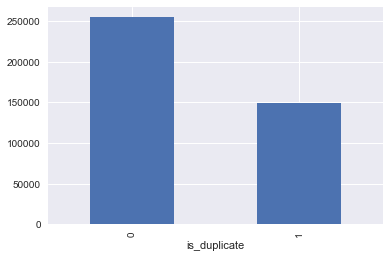

In [6]:
df.groupby("is_duplicate")['id'].count().plot.bar()

In [7]:
dfs=df[0:4000]

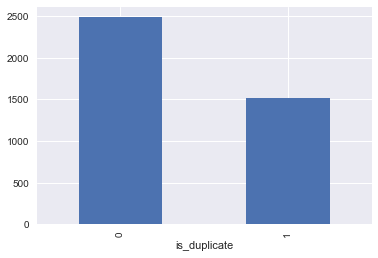

In [8]:
dfs.groupby("is_duplicate")['id'].count().plot.bar()

In [9]:
dfq1, dfq2 = dfs[['qid1', 'question1']], dfs[['qid2', 'question2']]
dfq1.columns = ['qid1', 'question']
dfq2.columns = ['qid2', 'question']

# merge two two dfs, there are two nans for question
dfqa = pd.concat((dfq1, dfq2), axis=0).fillna("")
nrows_for_q1 = dfqa.shape[0]/2
dfqa.shape

(8000, 3)

In [10]:
dfqa.head(8000)

,qid1,qid2,question
0,1,,What is the step by step guide to invest in sh...
1,3,,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,5,,How can I increase the speed of my internet co...
3,7,,Why am I mentally very lonely? How can I solve...
4,9,,"Which one dissolve in water quikly sugar, salt..."
5,11,,Astrology: I am a Capricorn Sun Cap moon and c...
6,13,,Should I buy tiago?
7,15,,How can I be a good geologist?
8,17,,When do you use シ instead of し?
9,19,,Motorola (company): Can I hack my Charter Moto...


In [11]:
#Transform questions by TF-IDF.
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
mq1 = TfidfVectorizer(max_features = 256).fit_transform(dfqa['question'].values)
mq1
# note a sparse matrix is a matrix where most of the values are zero

<8000x256 sparse matrix of type '<class 'numpy.float64'>'
	with 49542 stored elements in Compressed Sparse Row format>

In [12]:
diff = np.abs(mq1[::2] - mq1[1::2])
diff

<4000x256 sparse matrix of type '<class 'numpy.float64'>'
	with 46201 stored elements in Compressed Sparse Row format>

In [13]:
from sklearn.manifold import TSNE
tsne = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=200,
    verbose=2,
    angle=0.5
).fit_transform(diff.toarray())

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.445830
[t-SNE] Iteration 25: error = 1.6764634, gradient norm = 0.0092044
[t-SNE] Iteration 50: error = 1.6253616, gradient norm = 0.0089295
[t-SNE] Iteration 75: error = 1.3960834, gradient norm = 0.0040127
[t-SNE] Iteration 100: error = 1.3385195, gradient norm = 0.0046509
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.338519
[t-SNE] Iteration 125: error = 1.2370962, gradient norm = 0.0011350
[t-SNE] Iteration 150: error = 1.2067537, gradient norm = 0.0016405
[t-SNE] Iteration 175: error = 1.1998152, gradient norm = 0.0022244
[t-SNE] Iteration 200: error = 1.1999435, gradient norm = 0.0026549
[t-SNE]

In [14]:
trace1 = go.Scatter3d(
    x=tsne[:,0],
    y=tsne[:,1],
    z=tsne[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = dfs['is_duplicate'].values,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='test')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [15]:
df['q1len'] = df['question1'].str.len()
df['q2len'] = df['question2'].str.len()

df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

#wordshare here is calculates as
#(no. of words shared by the question pair)/(total no of words in q1+total no of words in q2)

def normalized_word_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))


df['word_share'] = df.apply(normalized_word_share, axis=1)

df.head(100)

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_n_words,q2_n_words,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,0.100000
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,86,90,16,16,0.258065
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0,19,62,4,11,0.000000
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,30,41,7,9,0.250000
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,31,37,8,8,0.375000
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,60,49,9,9,0.166667


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 11 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404290 non-null object
is_duplicate    404290 non-null int64
q1len           404290 non-null int64
q2len           404290 non-null int64
q1_n_words      404290 non-null int64
q2_n_words      404290 non-null int64
word_share      404290 non-null float64
dtypes: float64(1), int64(8), object(2)
memory usage: 33.9+ MB


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



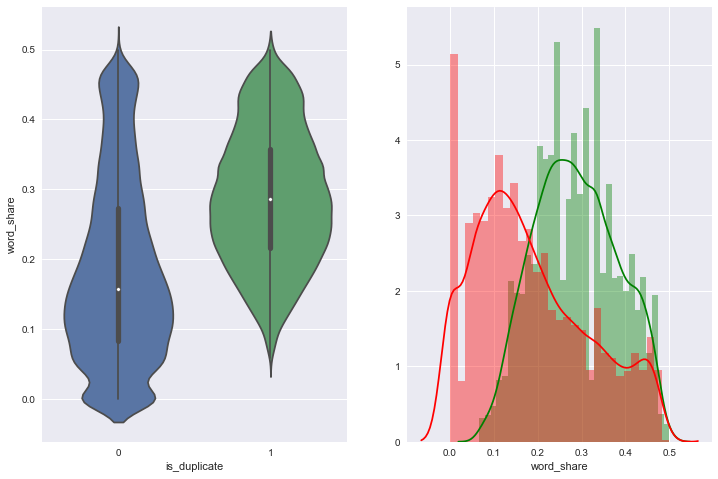

In [17]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:50000])
plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:10000], color = 'green')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:10000], color = 'red')

In [18]:
df_subsampled = df[0:2000]

trace = go.Scatter(
    y = df_subsampled['q1_n_words'].values,
    x = df_subsampled['q2_n_words'].values,
    mode='markers',
    marker=dict(
        size= df_subsampled['word_share'].values * 60,
        color = df_subsampled['is_duplicate'].values,
        colorscale='Portland',
        showscale=True,
        opacity=0.5,
        colorbar = dict(title = 'duplicate')
    ),
    text = np.round(df_subsampled['word_share'].values, decimals=2)
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Scatter plot of character lengths of question one and two',
    hovermode= 'closest',
        xaxis=dict(
        title= 'Question 1 word length',
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Question 2 word length',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterWords')

In [19]:
from IPython.display import display, HTML

df_subsampled['q_n_words_avg'] = np.round((df_subsampled['q1_n_words'] + df_subsampled['q2_n_words'])/2.0).astype(int)
print(df_subsampled['q_n_words_avg'].max())
#df_subsampled = df_subsampled[df_subsampled['q_n_words_avg'] < 20]
df_subsampled.head(2000)

39


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_n_words,q2_n_words,word_share,q_n_words_avg
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,0.434783,13
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,0.200000,10
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,0.166667,12
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0.000000,10
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,0.100000,10
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,86,90,16,16,0.258065,16
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0,19,62,4,11,0.000000,8
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,30,41,7,9,0.250000,8
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,31,37,8,8,0.375000,8
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,60,49,9,9,0.166667,9


In [20]:
df_subsampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
id               2000 non-null int64
qid1             2000 non-null int64
qid2             2000 non-null int64
question1        2000 non-null object
question2        2000 non-null object
is_duplicate     2000 non-null int64
q1len            2000 non-null int64
q2len            2000 non-null int64
q1_n_words       2000 non-null int64
q2_n_words       2000 non-null int64
word_share       2000 non-null float64
q_n_words_avg    2000 non-null int32
dtypes: float64(1), int32(1), int64(8), object(2)
memory usage: 179.8+ KB


In [21]:
word_lens = sorted(list(df_subsampled['q_n_words_avg'].unique()))
# make figure
figure = {
    'data': [],
    'layout': {
        'title': 'Scatter plot of char lenghts of Q1 and Q2 (size ~ word share similarity)',
    },
    'frames': []#,
    #'config': {'scrollzoom': True}
}

# fill in most of layout
figure['layout']['xaxis'] = {'range': [0, 200], 'title': 'Q1 length'}
figure['layout']['yaxis'] = {
    'range': [0, 200],
    'title': 'Q2 length'#,
    #'type': 'log'
}
figure['layout']['hovermode'] = 'closest'

figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 300, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Avg. number of words in both questions:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

# make data
word_len = word_lens[0]
dff = df_subsampled[df_subsampled['q_n_words_avg'] == word_len]
data_dict = {
    'x': list(dff['q1len']),
    'y': list(dff['q2len']),
    'mode': 'markers',
    'text': list(dff['is_duplicate']),
    'marker': {
        'sizemode': 'area',
        #'sizeref': 200000,
        'colorscale': 'Portland',
        'size': dff['word_share'].values * 120,
        'color': dff['is_duplicate'].values,
        'colorbar': dict(title = 'duplicate')
    },
    'name': 'some name'
}
figure['data'].append(data_dict)

# make frames
for word_len in word_lens:
    frame = {'data': [], 'name': str(word_len)}
    dff = df_subsampled[df_subsampled['q_n_words_avg'] == word_len]

    data_dict = {
        'x': list(dff['q1len']),
        'y': list(dff['q2len']),
        'mode': 'markers',
        'text': list(dff['is_duplicate']),
        'marker': {
            'sizemode': 'area',
            #'sizeref': 200000,
            'size': dff['word_share'].values * 120,
            'colorscale': 'Portland',
            'color': dff['is_duplicate'].values,
            'colorbar': dict(title = 'duplicate')
        },
        'name': 'some name'
    }
    frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [
        [word_len],
        {
            'frame': {'duration': 300, 'redraw': False},
            'mode': 'immediate',
            'transition': {'duration': 300}
        }
     ],
     'label': word_len,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

    
figure['layout']['sliders'] = [sliders_dict]

py.iplot(figure)

In [22]:
from sklearn.preprocessing import MinMaxScaler

df_subsampled = df[0:3000]
X = MinMaxScaler().fit_transform(df_subsampled[['q1_n_words', 'q1len', 'q2_n_words', 'q2len', 'word_share']])
y = df_subsampled['is_duplicate'].values

In [23]:
print(X)

[[ 0.17460317  0.15320334  0.16363636  0.15254237  0.86956522]
 [ 0.07936508  0.11142061  0.18181818  0.25762712  0.4       ]
 [ 0.17460317  0.17270195  0.12727273  0.15932203  0.33333333]
 ..., 
 [ 0.20634921  0.18384401  0.01818182  0.02372881  0.35294118]
 [ 0.15873016  0.1448468   0.18181818  0.16949153  0.92307692]
 [ 0.06349206  0.04735376  0.18181818  0.2         0.21052632]]


In [24]:
print(y)

[0 0 0 ..., 0 0 0]


In [25]:
tsne = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=200,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 0.034927
[t-SNE] Iteration 25: error = 1.9126372, gradient norm = 0.0037837
[t-SNE] Iteration 50: error = 1.7951859, gradient norm = 0.0026692
[t-SNE] Iteration 75: error = 1.4484156, gradient norm = 0.0008978
[t-SNE] Iteration 75: gradient norm 0.000898. Finished.
[t-SNE] KL divergence after 75 iterations with early exaggeration: 1.448416
[t-SNE] Iteration 100: error = 1.3439653, gradient norm = 0.0005720
[t-SNE] Iteration 100: gradient norm 0.000572. Finished.
[t-SNE] Error after 100 iterations: 1.448416


In [26]:
trace1 = go.Scatter3d(
    x=tsne[:,0],
    y=tsne[:,1],
    z=tsne[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = dfs['is_duplicate'].values,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with manually engineeredd features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



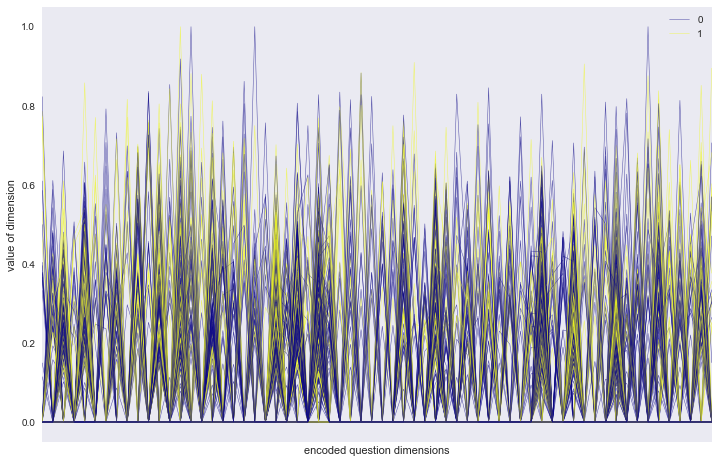

In [27]:
from pandas.tools.plotting import parallel_coordinates

df_subsampled = df[0:500]

N = 64

#encoded = HashingVectorizer(n_features = N).fit_transform(df_subsampled.apply(lambda row: row['question1']+' '+row['question2'], axis=1).values)
encoded = TfidfVectorizer(max_features = N).fit_transform(df_subsampled.apply(lambda row: row['question1']+' '+row['question2'], axis=1).values)
# generate columns in the dataframe for each of the 32 dimensions
cols = ['Vectorized_'+str(i) for i in range(encoded.shape[1])]
for idx, col in enumerate(cols):
    df_subsampled[col] = encoded[:,idx].toarray()

plt.figure(figsize=(12,8))
kws = {
    'linewidth': 0.5,
    'alpha': 0.7
}
parallel_coordinates(
    df_subsampled[cols + ['is_duplicate']],
    'is_duplicate',
    axvlines=False, colormap=plt.get_cmap('plasma'),
    **kws
)
#plt.grid(False)
plt.xticks([])
plt.xlabel("encoded question dimensions")
plt.ylabel("value of dimension")

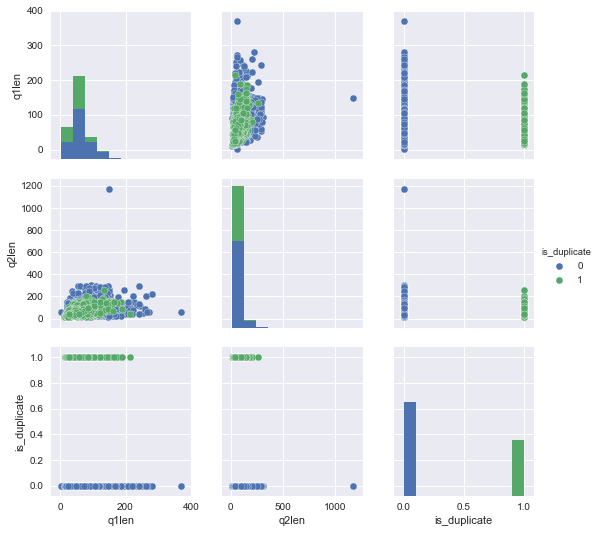

In [28]:
n = 10000
#sns.pairplot(df[['q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'is_duplicate']][0:n], hue='is_duplicate')
sns.pairplot(df[['q1len', 'q2len', 'is_duplicate']][0:n], hue='is_duplicate')

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler

#Compute the minimum and maximum to be used for later scaling.
scaler = MinMaxScaler().fit(df[['q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_share']])

X = scaler.transform(df[['q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_share']])
y = df['is_duplicate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((270874, 5), (133416, 5), (270874,), (133416,))

In [30]:
clf = LogisticRegression()
# c= inverse of regularization strenghth using 3-fold cross validation
grid = {
    'C': [1e-6, 1e-3, 1e0],
    'penalty': ['l1', 'l2']
}
cv = GridSearchCV(clf, grid, scoring='neg_log_loss', n_jobs=-1, verbose=1)
cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   25.0s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [1e-06, 0.001, 1.0], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_log_loss', verbose=1)

In [31]:
for i in range(1, len(cv.cv_results_['params'])+1):
    rank = cv.cv_results_['rank_test_score'][i-1]
    s = cv.cv_results_['mean_test_score'][i-1]
    sd = cv.cv_results_['std_test_score'][i-1]
    params = cv.cv_results_['params'][i-1]
    print("{0}. Mean validation neg log loss: {1:.3f} (std: {2:.3f}) - {3}".format(
        rank,
        s,
        sd,
        params
    ))

6. Mean validation neg log loss: -0.693 (std: 0.000) - {'C': 1e-06, 'penalty': 'l1'}
5. Mean validation neg log loss: -0.690 (std: 0.000) - {'C': 1e-06, 'penalty': 'l2'}
3. Mean validation neg log loss: -0.582 (std: 0.001) - {'C': 0.001, 'penalty': 'l1'}
4. Mean validation neg log loss: -0.586 (std: 0.001) - {'C': 0.001, 'penalty': 'l2'}
1. Mean validation neg log loss: -0.568 (std: 0.001) - {'C': 1.0, 'penalty': 'l1'}
2. Mean validation neg log loss: -0.569 (std: 0.001) - {'C': 1.0, 'penalty': 'l2'}


In [32]:
print(cv.best_params_)
print(cv.best_estimator_.coef_)

{'C': 1.0, 'penalty': 'l1'}
[[-13.51385077   4.31436557  10.35246775 -13.06129556   3.29714888]]


C: 1e-06, parameters [[-0.00419999 -0.00232428 -0.00354653 -0.00199889 -0.0018606 ]] and intercept [-0.03324753]
C: 0.0001, parameters [[-0.15977647 -0.09050407 -0.13253665 -0.08000122  0.68634253]] and intercept [-0.70425466]
C: 1.0, parameters [[-10.24038937  -0.91761179   6.7829151   -7.16457016   3.29874314]] and intercept [-1.35659649]


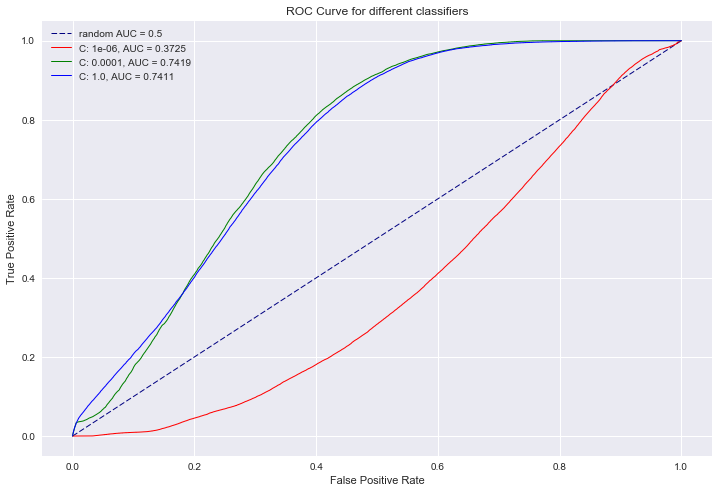

In [33]:
colors = ['r', 'g', 'b', 'y', 'k', 'c', 'm', 'brown', 'r']
lw = 1
Cs = [1e-6, 1e-4, 1e0]

plt.figure(figsize=(12,8))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for different classifiers')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

labels = []
for idx, C in enumerate(Cs):
    clf = LogisticRegression(C = C)
    clf.fit(X_train, y_train)
    print("C: {}, parameters {} and intercept {}".format(C, clf.coef_, clf.intercept_))
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=colors[idx])
    labels.append("C: {}, AUC = {}".format(C, np.round(roc_auc, 4)))

plt.legend(['random AUC = 0.5'] + labels)

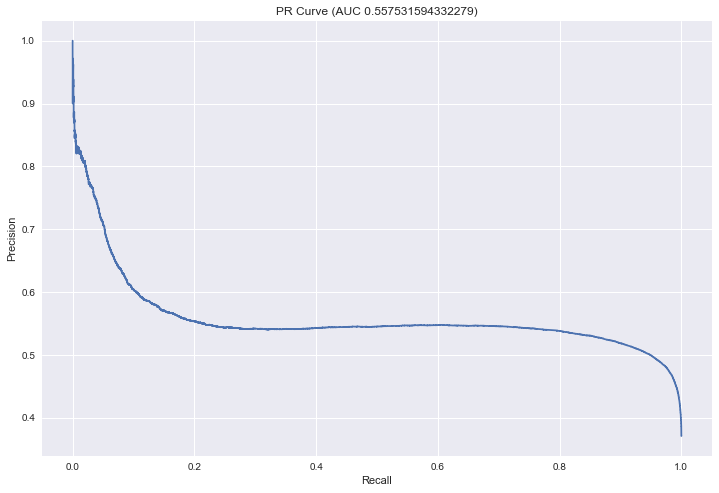

In [40]:
pr, re, _ = precision_recall_curve(y_test, cv.best_estimator_.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,8))
plt.plot(re, pr)
plt.title('PR Curve (AUC {})'.format(auc(re, pr)))
plt.xlabel('Recall')
plt.ylabel('Precision')

In [43]:
dftest = pd.read_csv("C:\\Users\\pankaj\\Documents\\Python notebooks\\test.csv").fillna("")

dftest['q1len'] = dftest['question1'].str.len()
dftest['q2len'] = dftest['question2'].str.len()

dftest['q1_n_words'] = dftest['question1'].apply(lambda row: len(row.split(" ")))
dftest['q2_n_words'] = dftest['question2'].apply(lambda row: len(row.split(" ")))

dftest['word_share'] = dftest.apply(normalized_word_share, axis=1)

dftest.head()

,test_id,question1,question2,q1len,q2len,q1_n_words,q2_n_words,word_share
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...,57,68,11,14,0.083333
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?,66,43,14,7,0.190476
2,2,What but is the best way to send money from Ch...,What you send money to China?,60,29,14,6,0.222222
3,3,Which food not emulsifiers?,What foods fibre?,27,17,4,3,0.000000
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?,32,30,4,6,0.300000


In [44]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345796 entries, 0 to 2345795
Data columns (total 8 columns):
test_id       int64
question1     object
question2     object
q1len         int64
q2len         int64
q1_n_words    int64
q2_n_words    int64
word_share    float64
dtypes: float64(1), int64(5), object(2)
memory usage: 143.2+ MB


In [45]:
retrained = cv.best_estimator_.fit(X, y)

X_Ontest = scaler.transform(dftest[['q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_share']])

y_Ontest = retrained.predict_proba(X_Ontest)[:,1]

result = pd.DataFrame({'test_id': dftest['test_id'], 'is_duplicate': y_Ontest})
result.head()

,is_duplicate,test_id
0,0.162131,0
1,0.355262,1
2,0.437638,2
3,0.153560,3
4,0.509533,4


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



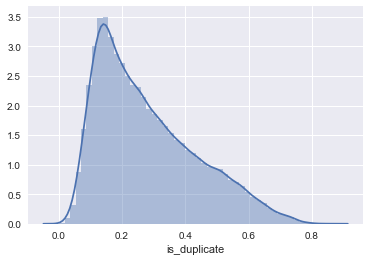

In [52]:
sns.distplot(result.is_duplicate[0:100000])